# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



The value of information is a function of the probability of this outcome:
$$
I(x_t) = \ln \frac{1}{P(x_t)} = -\ln P(x_t)
$$
Entropy can be defined as the weighted value of information across a probability distribution:
$$
H(P) = -\mathbb{E} \ln P(x)
$$
Expanding this equation for the given scenario, we get:
$$
H(P) = 0.7 \times -\ln (0.7) + 0.3 \times -\ln (0.3) \approx 0.61 \, \text{nats}
$$
Entropy is less than 1 because there is some predictability in the outcome for a coin toss. This is because the probability of heads is 0.7 instead of another more uncertain value like 0.5. Therefore, the weighted value of information (entropy) is lower as we have an idea of what the expected value is.

#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

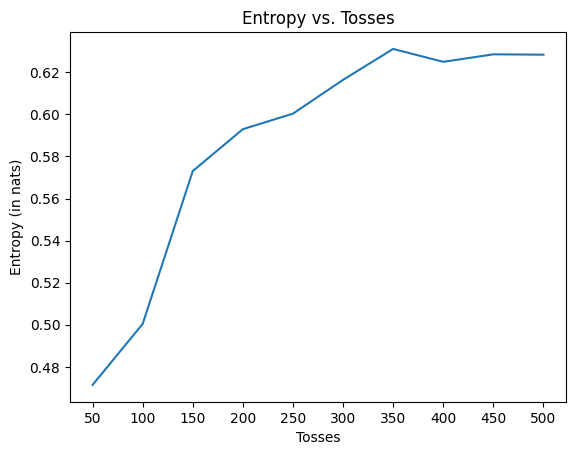

In [1]:
import random
import math
import matplotlib.pyplot as plt
p = 0.7
m = 500
heads = 0
tosses = [_ for _ in range(50, 501, 50)]
entropies = []
for i in range(1, m + 1):
    heads += 1 if random.random() < 0.7 else 0
    if i % 50 == 0:
        p_heads = heads / i
        entropy = p_heads * -math.log(p_heads) + (1 - p_heads) * -math.log(1 - p_heads)
        entropies.append(entropy)
plt.plot(tosses, entropies)
plt.xticks(tosses, tosses)
plt.xlabel('Tosses')
plt.ylabel('Entropy (in nats)')
plt.title("Entropy vs. Tosses")
plt.show()

It seems that the sample's entropy is converging on the distribution's entropy that we calculated in an earlier step.

#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



Bayes Rule is given by
$$
P(A|B)=\frac{P(B|A)\,P(A)}{P(B)}
$$
where P(A|B) is the posterior, P(B|A) is the liklihood, P(A) is the prior, and P(B) is the marginal.
The Bayesian parameter learning approach defines the parameter(s) for a distribution, updating them as data arrive. Since we are working with a coin toss, it can be modeled by a Bernoulli distribution. We can model this distribution with 1 parameter, the probability of success. However, we will instead use a beta distribution which parameterizes a distribution's parameters:
$$
Beta(\theta;a,b)=\alpha\,\theta^{a-1}(1-\theta)^{b-1}
$$
We can treat the a and b parameters as virtual counts, using them to calculate the mean and variance of our original parameter theta. The mean is represented by the following expression:
$$
\frac{a}{a+b}
$$
Meanwhile, the variance is represented by the following expressions:
$$
\frac{ab}{(a + b + 1)(a + b)^{2}}
$$
In order to apply this concept, I will continue to sample heads/tails based on an assumed population distribution where the probability of heads is 0.7 and the probability of tails is 0.3. However, I will update the virtual counts of the beta distribution, so I can use the aforementioned expressions to calculate the mean and variance of probability of heads for the table. I will also plot the probability of heads as a function of the probability of heads given the sequence of heads and tails sampled from the distribution I mentioned earlier for m = [0,1, 2, 3, 4, 5, 10, 20, 50, 100].

In [2]:
# function that does Bayesian parameter estimation given
# 1) distribution probability of success p
# 2) number of samples
def parameter_estimation(p, m):
    # initialize hypothesis prior to 1/2 (a = b = 1)
    a = b = 1
    mean = a / (a + b)
    variance = (a * b)  / ((a + b + 1)*(a + b)**2)
    # sample from distribution
    for i in range(m):
        # increment virtual counts based on outcome of toss
        toss = random.random()
        if toss < p:
            a += 1
        else:
            b += 1
        # update parameters based on new data
        mean = a / (a + b)
        variance = (a * b)  / ((a + b + 1)*(a + b)**2)
    return  a, b, mean, variance

In [3]:
# perform parameter estimation for various sample sizes
# displaying returned mean and variance in table
import pandas as pd
p = 0.7
m = [0,1,2,3,4,5,10,20,50,100]
aList = []
bList = []
means = []
variances = []
for tosses in m:
    a, b, mean, variance = parameter_estimation(0.7, tosses)
    aList.append(a)
    bList.append(b)
    means.append(mean)
    variances.append(variance)
df = pd.DataFrame({
    "m": m,
    "mean": means,
    "variance": variances
})
print(df)

     m      mean  variance
0    0  0.500000  0.083333
1    1  0.666667  0.055556
2    2  0.750000  0.037500
3    3  0.600000  0.040000
4    4  0.833333  0.019841
5    5  0.857143  0.015306
6   10  0.833333  0.010684
7   20  0.818182  0.006468
8   50  0.615385  0.004466
9  100  0.637255  0.002244


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
# defines x's for which to get y's for
x = np.linspace(0, 1, 100)
# gets y's for different sample sizes
# using their estimates means and variances
ys = []
for i in range(len(m)):
    # calculates y's using beta distribution
    pdf = beta.pdf(x, aList[i], bList[i])
    ys.append(pdf)
# function for plotting graph given
# x's, y's, and sample size
def plot(x, y, m):
    plt.plot(x, y)
    plt.title(f'Probability of Heads vs. Probability of Heads Given {m} samples')
    plt.xlabel('Sampled Parameter Theta')
    plt.ylabel('Probability of Population Parameter = Sampled Parameter')
    plt.grid(True)
    plt.show()

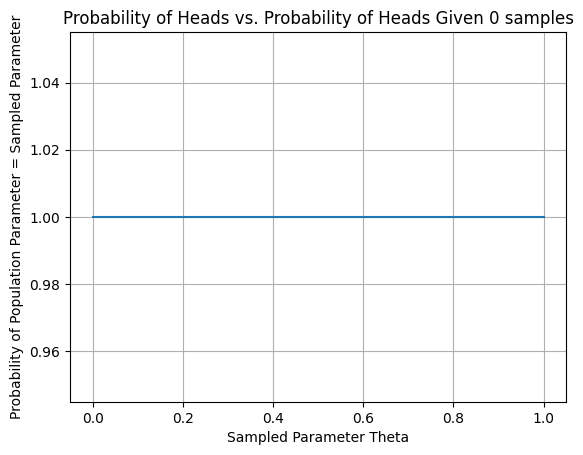

In [5]:
plot(x, ys[0], m[0])

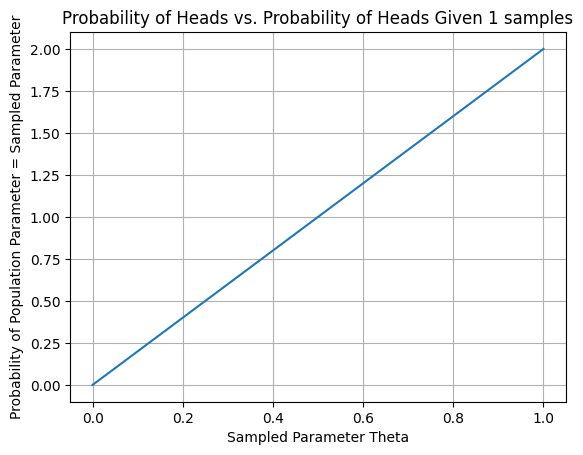

In [6]:
plot(x, ys[1], m[1])

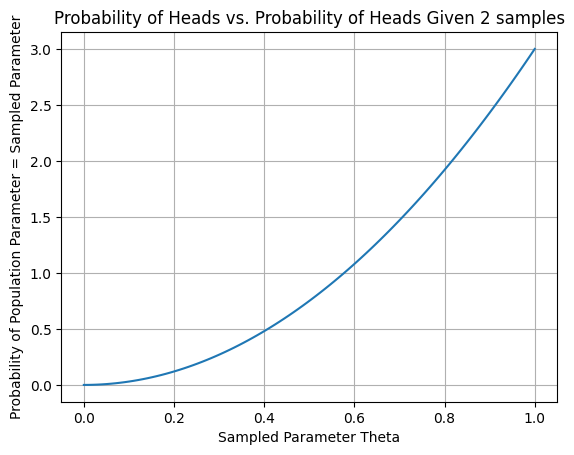

In [7]:
plot(x, ys[2], m[2])

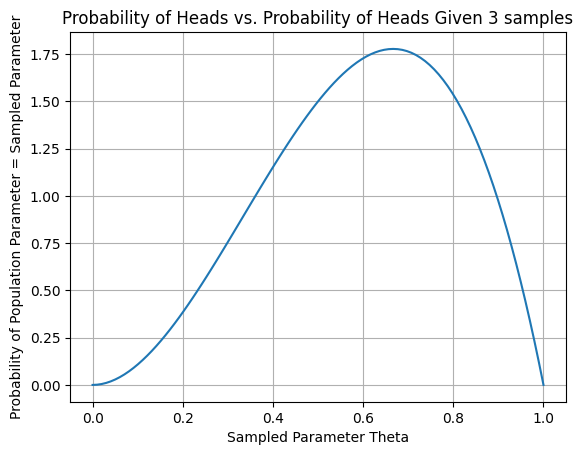

In [8]:
plot(x, ys[3], m[3])

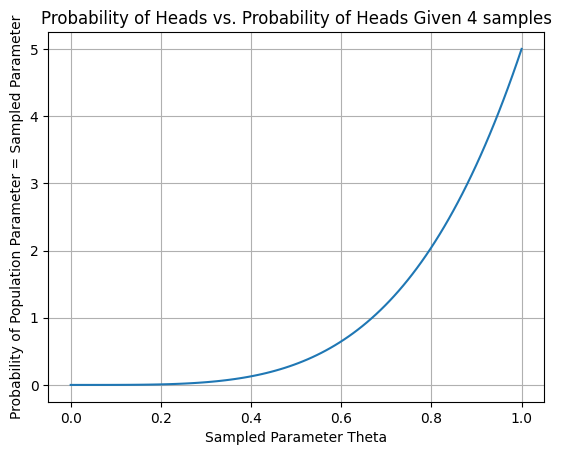

In [9]:
plot(x, ys[4], m[4])

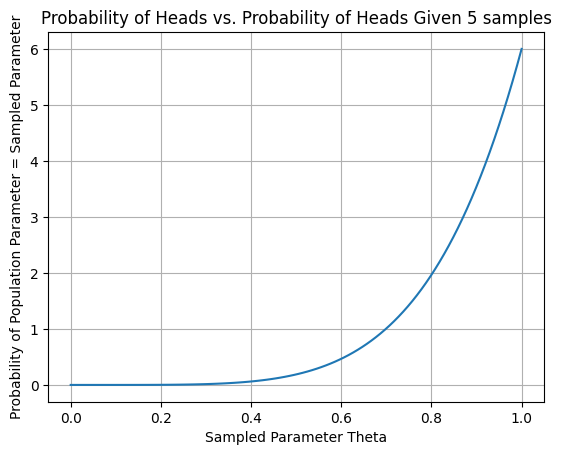

In [10]:
plot(x, ys[5], m[5])

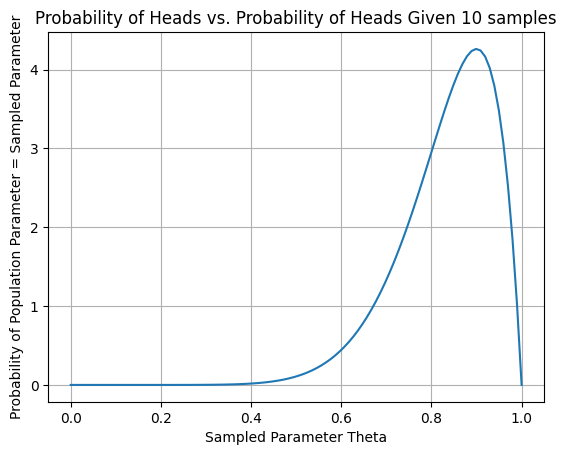

In [11]:
plot(x, ys[6], m[6])

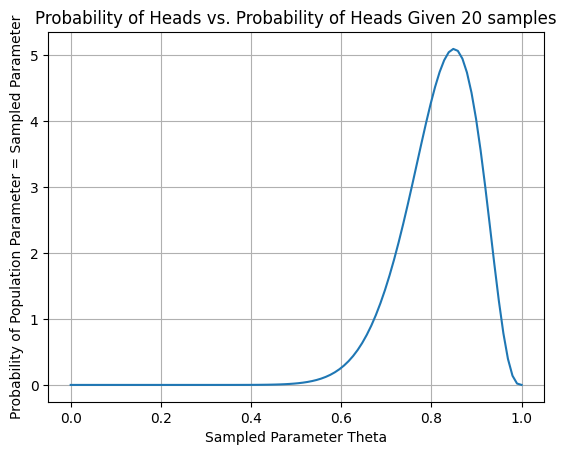

In [12]:
plot(x, ys[7], m[7])

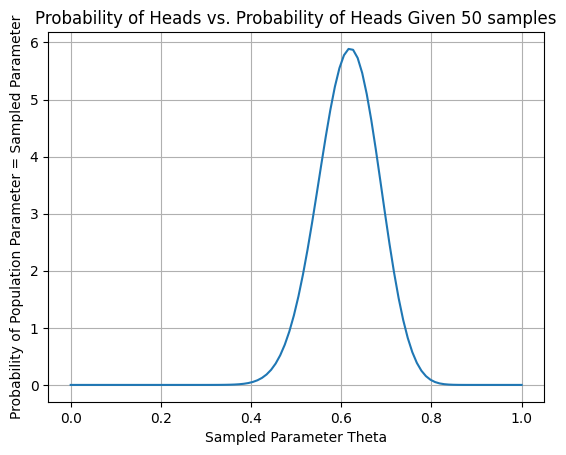

In [13]:
plot(x, ys[8], m[8])

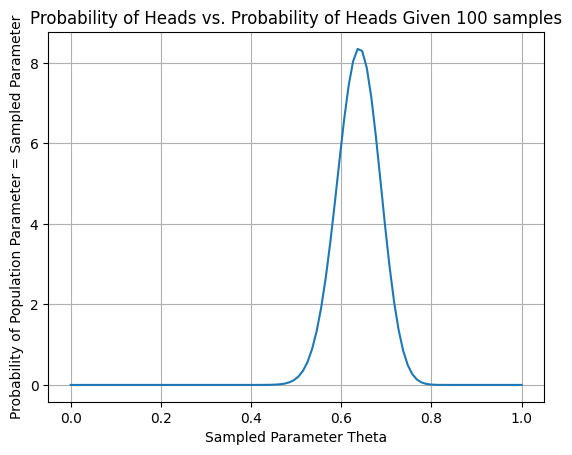

In [14]:
plot(x, ys[9], m[9])

The plots clearly show that when using a Bayesian parameter learning approach, as we receive more samples, our beta distribution starts to resemble a Gaussian distribution clustering around the population mean (we know its value since we sampled from it). Additionally, the variance also decreases as we receive more samples, showing that we are more certain/confident about our estimate for the parameter (probability of success/heads).

### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

In [15]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [16]:
def generate(m):
    X = 2 * np.random.rand(m, 1)
    y = 4 + 3 * X + np.random.randn(m, 1)
    return X, y

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

In this problem, we are applying a Bayesian approach to linear regression. We will use a model that is constrained to go through the origin. The code for this BayesianRegression was retrived from [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). Explanations for each instance method within the class is provided below.

In [17]:
import numpy as np

# from prml.linear._regression import Regression


class BayesianRegression():
    """Bayesian regression model.

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """
    # This is the constructor for the BayesianRegressor.
    # As we can see, this initializes the hyperparameters
    # that describe the prior, setting them to be 1 for
    # both the alpha and the beta. We are also setting the
    # parameter that describes the function to be None
    # as well as the precision to be None. In our case,
    # w_mean would be the slope of our graph. Precision,
    # however, describes how precise this slope is
    # (inverse of the covariance matrix).
    def __init__(self, alpha: float = 1., beta: float = 1.):
        """Initialize bayesian linear regression model.

        Parameters
        ----------
        alpha : float, optional
            Precision parameter of the prior, by default 1.
        beta : float, optional
            Precision parameter of the likelihood, by default 1.
        """
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None
    # This method that returns whether both
    # the mean and precision described previously are set to
    # None. When the model is instantiated, this method
    # will initially return True.
    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None
    # This method returns the mean and precision if they are
    # defined (not None). Otherwise, it returns a vector
    # of 0's for the mean and a diagonal matrix of the alpha value.
    def _get_prior(self, ndim: int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)
    # This method updates the previous mean and precisions
    # with the data we sampled/provided. It also computes the
    # covariance using the inverse operation on the
    # precision.
    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        """Bayesian update of parameters given training dataset.

        Parameters
        ----------
        x_train : np.ndarray
            training data independent variable (N, n_features)
        y_train :  np.ndarray
            training data dependent variable
        """
        mean_prev, precision_prev = self._get_prior(np.size(x_train, 1))

        w_precision = precision_prev + self.beta * x_train.T @ x_train
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * x_train.T @ y_train,
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)
    # If sample_size is set method makes predictions for
    # the data we input by sampling from the distribution
    # we found for the our parameter. This distribution is
    # parameterized by the the mean and covariance matrix.
    # By doing a matrix multiplication, it uses the
    # input/data and sampled parameters to make predictions
    # for the y's, returning them.
    # Otherwise, it just does a matrix multiplication without
    # sampling (using the means).
    # This method also calculates the st. dev. for each data
    # point, returning mean and std. dev. if return_std is True.
    def predict(
        self,
        x: np.ndarray,
        return_std: bool = False,
        sample_size: int = None,
    ):
        """Return mean (and standard deviation) of predictive distribution.

        Parameters
        ----------
        x : np.ndarray
            independent variable (N, n_features)
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : np.ndarray
            mean of the predictive distribution (N,)
        y_std : np.ndarray
            standard deviation of the predictive distribution (N,)
        y_sample : np.ndarray
            samples from the predictive distribution (N, sample_size)
        """
        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size,
            )
            y_sample = x @ w_sample.T
            return y_sample
        y = x @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(x @ self.w_cov * x, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y


Please note that in the below example, the best the Bayesian Regressor can do is make it's slope parameter parallel to the data points. This is because our data points were generated using the example from GERON. However, our Bayesian Regressor is taking inspiration from AIMA, which constrains the model parameters to 1 so that we can only change the slope, not the y-intercept.

In [18]:
# generates the small and large datasets
small_X, small_y = generate(3)
big_X, big_y = generate(10)

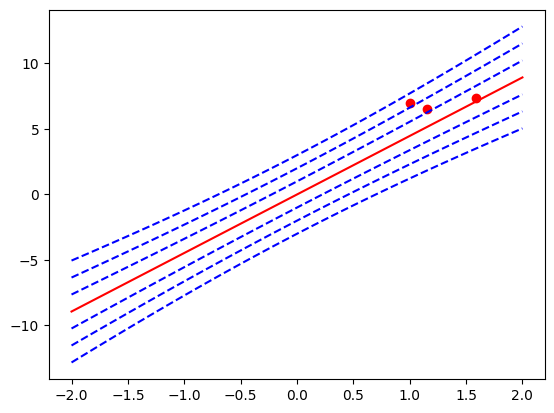

In [19]:
from scipy.interpolate import CubicSpline
# instantiated model, fitting it in datasets
small_model = BayesianRegression()
small_model.fit(small_X, small_y)
# created datapoints for the plot
plot_x = np.linspace(-2, 2, 100).reshape(-1, 1)
# getting mean and standard deviation for each data point
small_y_hat, small_y_std_dev = small_model.predict(plot_x, return_std = True)
small_y_std_dev = small_y_std_dev.reshape(-1, 1)
# plotting predictions and data points
plt.plot(plot_x, small_y_hat, color='red')
plt.scatter(small_X, small_y, color='red')
# plotting standard deviations
std_devs = [-3, -2, -1, 1, 2, 3]
for std_dev in std_devs:
    cs = CubicSpline(plot_x.reshape(-1), small_y_hat.reshape(-1) + std_dev *  small_y_std_dev.reshape(-1))
    y_interp = cs(plot_x)
    plt.plot(plot_x, y_interp, color="blue", linestyle="dashed")

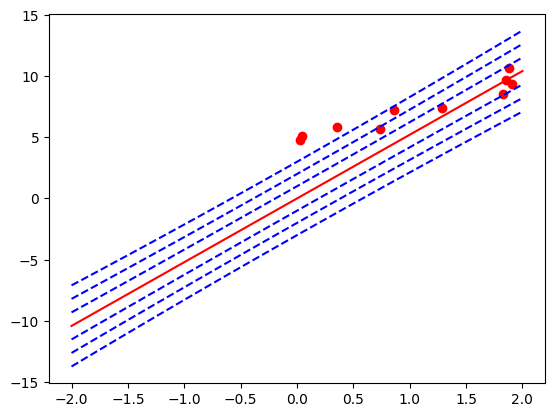

In [20]:
# same code as above but for the larger dataset
big_model = BayesianRegression()
big_model.fit(big_X, big_y)
# getting mean and standard deviation for each data point
big_y_hat, big_y_std_dev = big_model.predict(plot_x, return_std = True)
big_y_std_dev = big_y_std_dev.reshape(-1, 1)
# plotting predictions and data points
plt.plot(plot_x, big_y_hat, color='red')
plt.scatter(big_X, big_y, color='red')
# plotting standard deviations
for std_dev in std_devs:
    cs = CubicSpline(plot_x.reshape(-1), big_y_hat.reshape(-1) + std_dev *  big_y_std_dev.reshape(-1))
    y_interp = cs(plot_x)
    plt.plot(plot_x, y_interp, color="blue", linestyle="dashed")

Although it may be a bit difficult to tell due to the small disparity between the sample sizes (3 is relatively close to 10), it can clearly be seen that with a larger sample size, there is much less noise, mostly attributed to the fixed noise from the generated data. With a smaller sample size, however, the uncertainty increases with distance from the observed data points. This makes sense as while the conventional approach produces the best hypothesis and a fixed variance for the prediction error, the Bayesian approach adds in confidence about the hypothesis value and ensures that predictions for unseen data points far from the observed data aren't considerd reliable. This is done by not fixing the variance globally. Instead, we place a prior on the model parameters, the model coefficients and variance.